In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from fcmeans import FCM
import seaborn as sns
# Đọc dữ liệu
data = pd.read_csv("cardiovascular_disease_dataset.csv", sep=';')

In [135]:
data.describe

<bound method NDFrame.describe of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

     

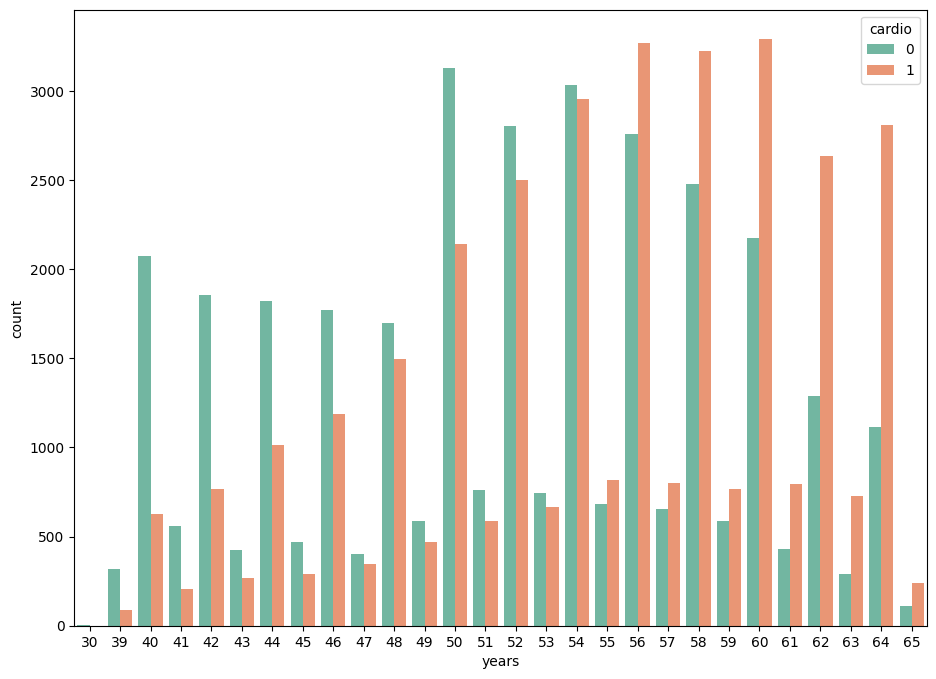

In [136]:
#Age is measured in days, height is in centimeters
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
data['years'] = (data['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = data, palette="Set2");

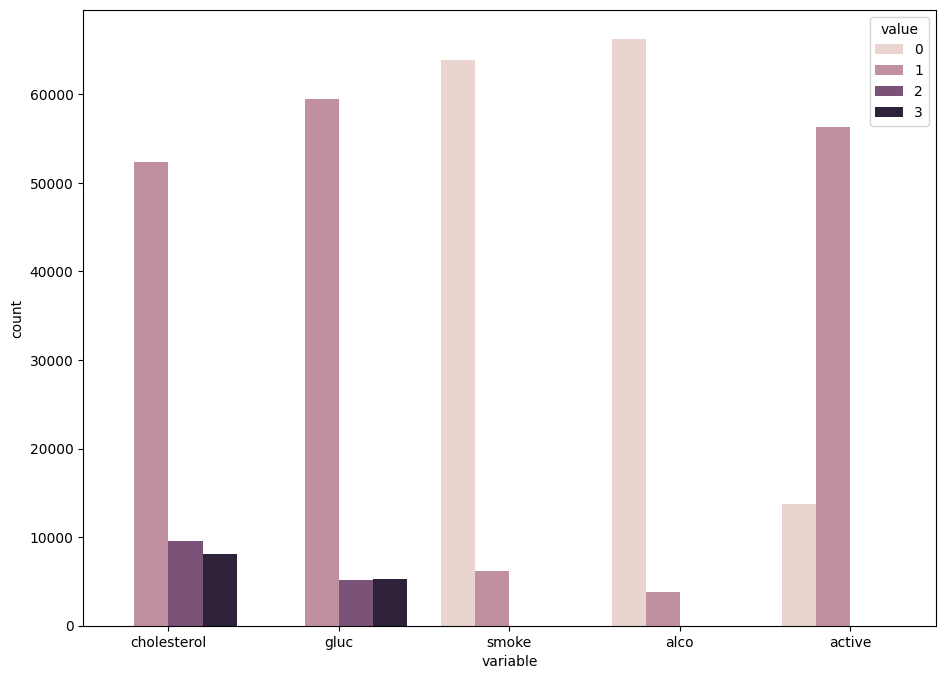

In [137]:
df_categorical = data.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));

In [138]:
# Kiểm tra giá trị thiếu
missing_values = data.isnull().sum()
print(missing_values)


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
years          0
dtype: int64


In [139]:
# Tách thuộc tính và nhãn
X = data.drop(columns=['cardio'])
y = data['cardio']


In [140]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [141]:
# Giảm chiều dữ liệu để vẽ biểu đồ
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [142]:
# Khởi tạo và huấn luyện mô hình Fuzzy C-means
fcm = FCM(n_clusters=2)
fcm.fit(X_scaled)

In [143]:
# Dự đoán cụm
fcm_labels = fcm.predict(X_scaled)

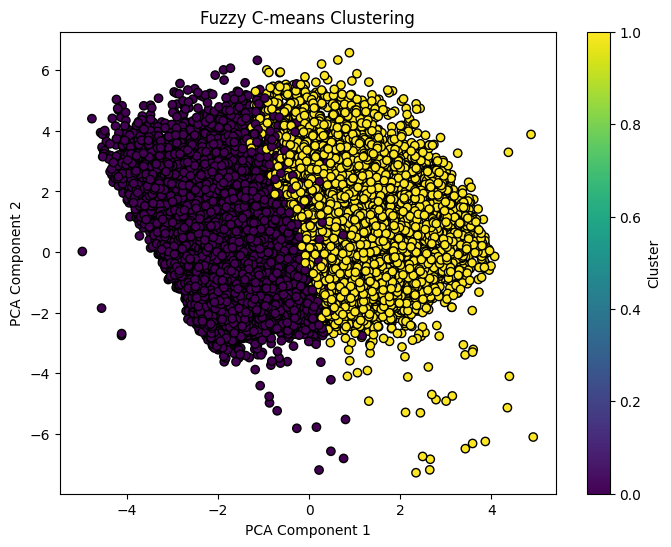

In [144]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=fcm_labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('Fuzzy C-means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [145]:
class_label=data['cardio']
def acc():
    count=0
    for x in range(len(data)):
        if fcm_labels[x]==class_label[x]:
                   count+=1
    return (count/len(data))*100
print("Độ chính xác của thuật toán =" , acc())

Độ chính xác của thuật toán = 60.23714285714286


In [146]:
id=data['id']
def defectIds():
    for x in range(len(data)):
        if fcm_labels[x]!=class_label[x]:
            print(id[x])

In [147]:
#bad IDs classfied
defectIds()

2
3
8
9
14
15
21
24
25
29
31
33
35
37
40
42
47
53
54
56
60
61
66
67
68
70
73
83
97
107
123
125
126
129
132
134
141
142
143
144
149
154
166
167
170
171
174
176
177
178
184
189
196
201
203
206
208
209
211
213
215
216
220
234
235
240
242
244
250
252
254
255
265
267
271
277
278
281
283
290
295
297
303
305
308
309
312
314
316
324
327
328
332
335
337
338
341
342
344
346
352
357
358
363
366
369
384
385
389
390
399
410
412
416
417
420
427
428
443
446
450
452
454
457
467
475
482
485
486
487
490
494
495
502
506
508
518
522
525
526
528
531
538
539
542
543
550
551
555
559
563
569
577
580
582
583
585
586
587
593
594
600
606
608
609
611
612
616
625
628
631
638
641
659
660
663
667
670
679
680
681
682
683
684
686
688
705
708
711
712
713
714
718
720
721
728
732
733
734
736
737
739
741
745
748
749
756
761
764
766
767
769
772
775
776
779
784
786
789
792
797
798
800
802
810
811
812
813
817
826
829
830
836
837
841
847
851
856
864
870
872
877
879
884
886
890
896
907
908
910
911
912
913
918
919
920
921
922
9